In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import neighbors


In [2]:
df = pd.read_csv("very_clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)
neighbour = [1,2,3,4,5,6,7,8,9]

     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1297       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1298       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1299       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1300           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1301         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

      Screen Size                           GPU Operating Syste

In [3]:
Ultrabook = df.loc[df['Category'] == 'Ultrabook']
Notebook = df.loc[df['Category'] == 'Notebook']
Netbook = df.loc[df['Category'] == 'Netbook']
Gaming = df.loc[df['Category'] == 'Gaming']
Convertible = df.loc[df['Category'] == '2 in 1 Convertible']
Workstation = df.loc[df['Category'] == 'Workstation']

In [4]:
def getSSE(prediction, fact):
    total = 0
    for i in range(len(prediction)):
        temp = (prediction[i] - fact[i])**2
        total += temp
    return total

def plotResults(df, name, y, x_test, y_test, pred):
    plt.figure(1, figsize=(20,10))
    plt.subplot(231)
    plt.scatter(df['RAM'], y)
    plt.title('RAM vs Price (All ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Euros)')
    plt.subplot(232)
    plt.scatter(df['fullRes'], y)
    plt.title('fullRes vs Price (All ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Euros)')
    plt.subplot(233)
    plt.scatter(df['Clockspeed'], y)
    plt.title('Clockspeed vs Price (All ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Euros)')
    plt.subplot(234)
    plt.scatter([i[0] for i in x_test],y_test, c='red')
    plt.scatter([i[0] for i in x_test],pred)
    plt.title('RAM vs Price (Test ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Euros)')
    plt.subplot(235)
    plt.scatter([i[1] for i in x_test],y_test, c='red')
    plt.scatter([i[1] for i in x_test],pred)
    plt.title('fullRes vs Price (Test ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Euros)')
    plt.subplot(236)
    plt.scatter([i[2] for i in x_test],y_test, c='red')
    plt.scatter([i[2] for i in x_test],pred)
    plt.title('Clockspeed vs Price (Test ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Euros)')
    plt.show()


In [5]:
def getBestR2(x_train,y_train,x_test,y_test,laptop_type):
    r2_array = []
    for i in range (1,10):
        knn = neighbors.KNeighborsRegressor(n_neighbors = i).fit(x_train,y_train)
        pred = knn.predict(x_test)
        mse = mean_squared_error(y_test, pred)
        sse = getSSE(pred, y_test)
        r2 = r2_score(y_test,pred)
        r2_array.append(r2)
    plt.plot(neighbour,r2_array)
    plt.xticks(np.arange(min(neighbour), max(neighbour)+1, 1.0))
    plt.xlabel("Number of Neighbours")
    plt.ylabel("R^2")
    plt.title("R^2 Comparison to the Number of Neighbour for "+laptop_type)
    plt.show()

results = pd.DataFrame(columns=("Category","MSE", "SSE", "R2"))

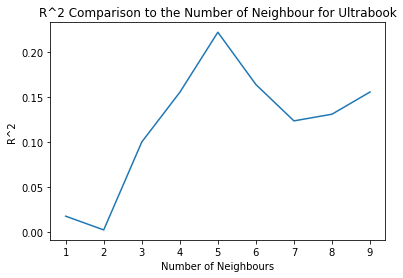

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004


In [6]:
# Ultrabook
ultra_x = Ultrabook[['RAM', 'fullRes', 'Clockspeed']].values
ultra_y = Ultrabook['Price (Euros)'].values
ultra_x_train, ultra_x_test, ultra_y_train, ultra_y_test = train_test_split(ultra_x, ultra_y, test_size = 0.3, random_state = 2201798761)
getBestR2(ultra_x_train,ultra_y_train,ultra_x_test,ultra_y_test,"Ultrabook")
ultra_knn = neighbors.KNeighborsRegressor(n_neighbors = 5).fit(ultra_x_train,ultra_y_train)
ultra_pred = ultra_knn.predict(ultra_x_test)



ultra_mse = mean_squared_error(ultra_y_test, ultra_pred)
ultra_sse = getSSE(ultra_pred, ultra_y_test)
ultra_r2 = r2_score(ultra_y_test, ultra_pred)

append = pd.DataFrame({"Category":["Ultrabook"], "MSE":[ultra_mse], "SSE":[ultra_sse], "R2":[ultra_r2]})
results = results.append(append, ignore_index=True)
results

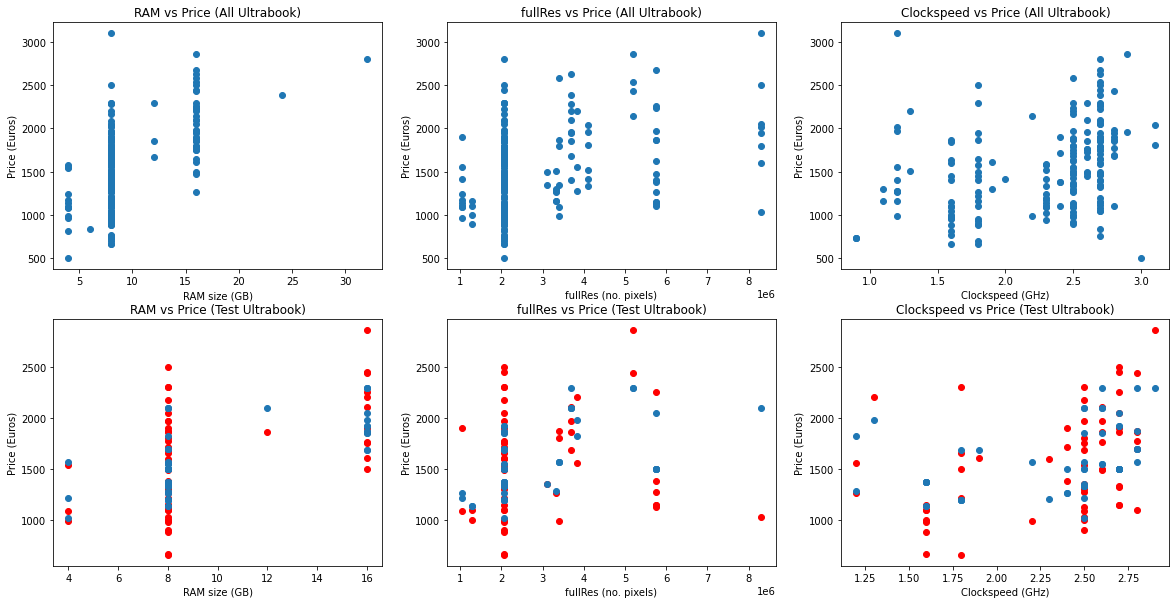

In [7]:
plotResults(Ultrabook,"Ultrabook",ultra_y,ultra_x_test,ultra_y_test,ultra_pred)



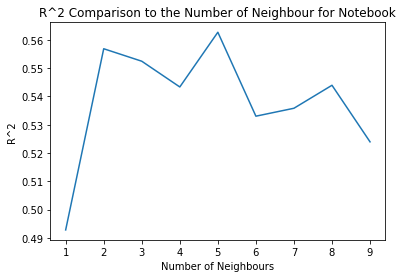

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004
1,Notebook,117391.352511,25708706.20,0.562647


In [8]:
# Notebook
note_x = Notebook[['RAM', 'fullRes', 'Clockspeed']].values
note_y = Notebook['Price (Euros)'].values
note_x_train, note_x_test, note_y_train, note_y_test = train_test_split(note_x, note_y, test_size = 0.3, random_state = 2201798761)
getBestR2(note_x_train,note_y_train,note_x_test,note_y_test,"Notebook")
note_knn = neighbors.KNeighborsRegressor(n_neighbors = 5).fit(note_x_train,note_y_train)
note_pred = note_knn.predict(note_x_test)

note_mse = mean_squared_error(note_y_test, note_pred)
note_sse = getSSE(note_pred, note_y_test)
note_r2 = r2_score(note_y_test, note_pred)
append = pd.DataFrame({"Category":["Notebook"], "MSE":[note_mse], "SSE":[note_sse], "R2":[note_r2]})
results = results.append(append, ignore_index=True)
results

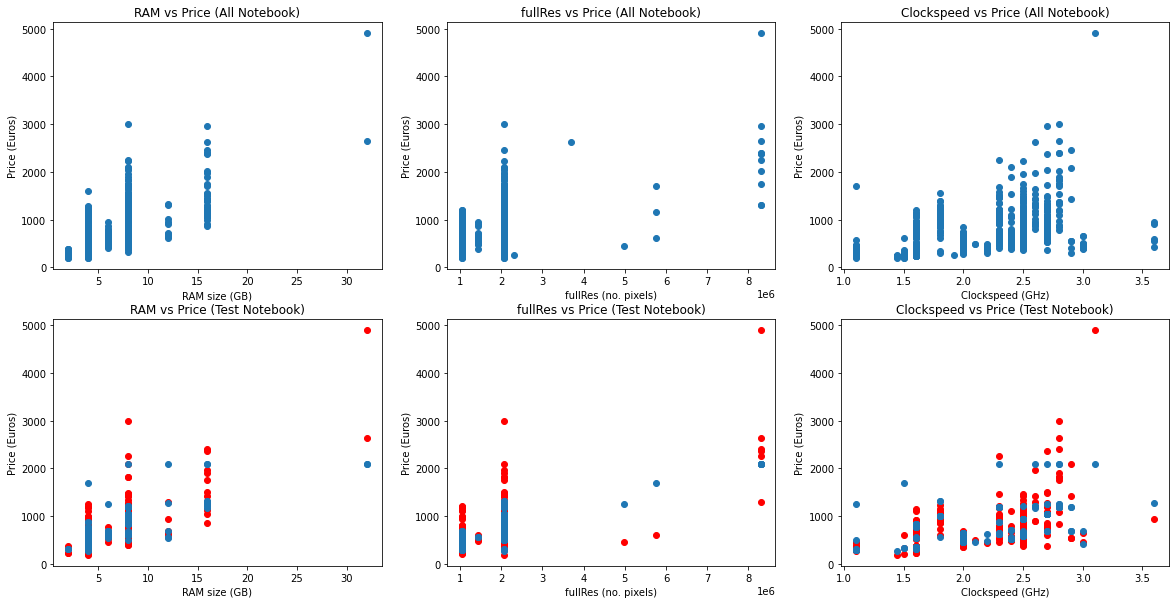

In [9]:
plotResults(Notebook,"Notebook",note_y,note_x_test,note_y_test,note_pred)


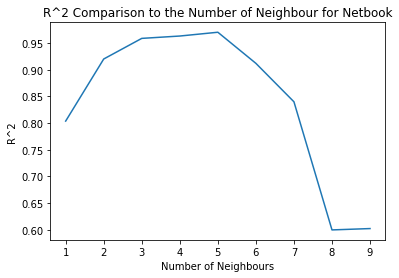

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004
1,Notebook,117391.352511,25708706.20,0.562647
2,Netbook,6142.605000,49140.84,0.970437


In [10]:
# Netbook
net_x = Netbook[['RAM', 'fullRes', 'Clockspeed']].values
net_y = Netbook['Price (Euros)'].values
net_x_train, net_x_test, net_y_train, net_y_test = train_test_split(net_x, net_y, test_size = 0.3, random_state = 2201798761)
getBestR2(net_x_train,net_y_train,net_x_test,net_y_test,"Netbook")
net_knn = neighbors.KNeighborsRegressor(n_neighbors = 5).fit(net_x_train,net_y_train)
net_pred = net_knn.predict(net_x_test)

net_mse = mean_squared_error(net_y_test, net_pred)
net_sse = getSSE(net_pred, net_y_test)
net_r2 = r2_score(net_y_test, net_pred)
append = pd.DataFrame({"Category":["Netbook"], "MSE":[net_mse], "SSE":[net_sse], "R2":[net_r2]})
results = results.append(append, ignore_index=True)
results

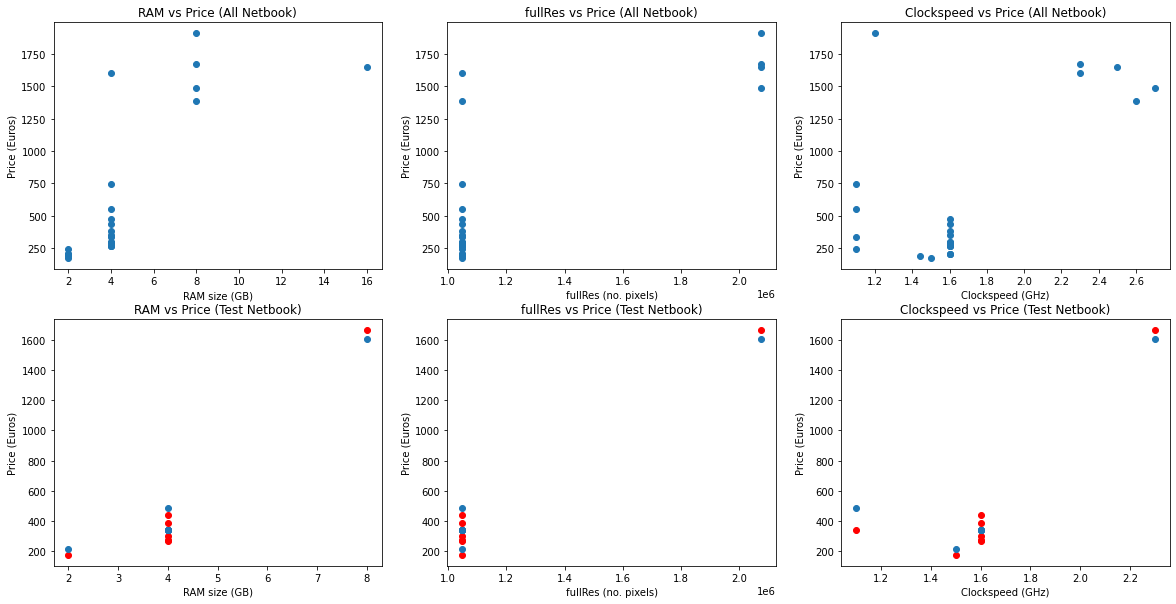

In [11]:
plotResults(Netbook,"Netbook",net_y,net_x_test,net_y_test,net_pred)


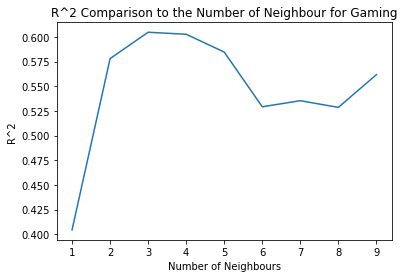

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004
1,Notebook,117391.352511,25708706.20,0.562647
2,Netbook,6142.605000,49140.84,0.970437
3,Gaming,312283.395484,19361570.52,0.584608


In [12]:
# Gaming
game_x = Gaming[['RAM', 'fullRes', 'Clockspeed']].values
game_y = Gaming['Price (Euros)'].values
game_x_train, game_x_test, game_y_train, game_y_test = train_test_split(game_x, game_y, test_size = 0.3, random_state = 2201798761)
getBestR2(game_x_train,game_y_train,game_x_test,game_y_test,"Gaming")
game_knn = neighbors.KNeighborsRegressor(n_neighbors = 5).fit(game_x_train,game_y_train)
game_pred = game_knn.predict(game_x_test)

game_mse = mean_squared_error(game_y_test, game_pred)
game_sse = getSSE(game_pred, game_y_test)
game_r2 = r2_score(game_y_test, game_pred)
append = pd.DataFrame({"Category":["Gaming"], "MSE":[game_mse], "SSE":[game_sse], "R2":[game_r2]})
results = results.append(append, ignore_index=True)
results

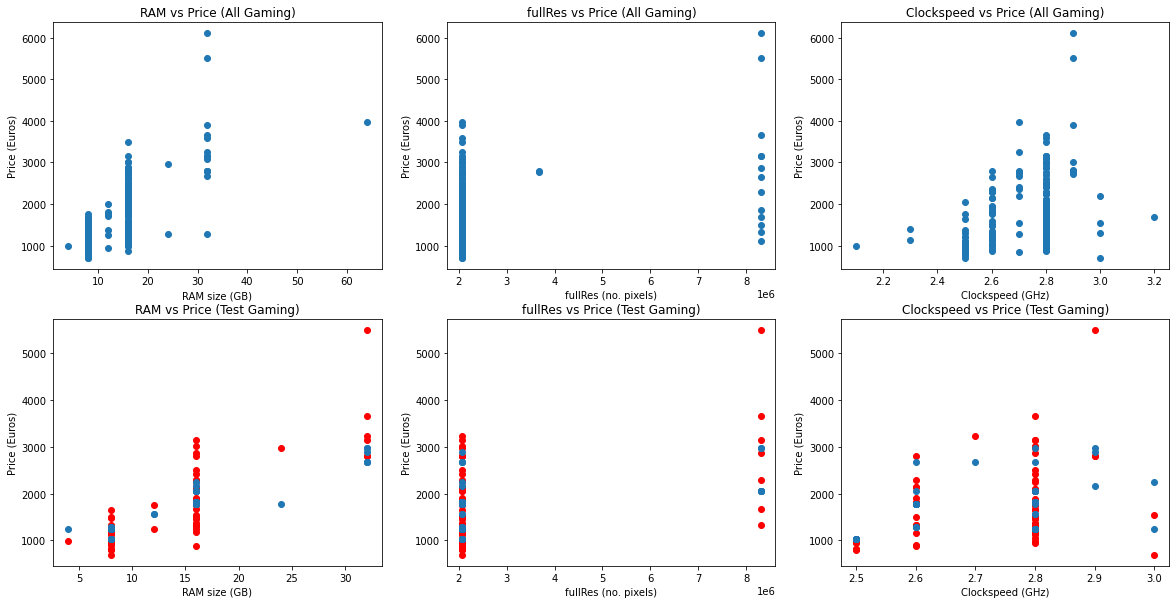

In [13]:
plotResults(Gaming,"Gaming",game_y,game_x_test,game_y_test,game_pred)

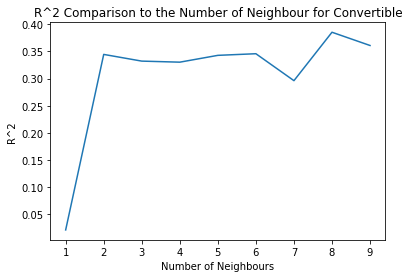

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004
1,Notebook,117391.352511,25708706.20,0.562647
2,Netbook,6142.605000,49140.84,0.970437
3,Gaming,312283.395484,19361570.52,0.584608
4,Convertible,203055.085556,7309983.08,0.342835


In [14]:
# Convertible
conv_x = Convertible[['RAM', 'fullRes', 'Clockspeed']].values
conv_y = Convertible['Price (Euros)'].values
conv_x_train, conv_x_test, conv_y_train, conv_y_test = train_test_split(conv_x, conv_y, test_size = 0.3, random_state = 2201798761)
getBestR2(conv_x_train,conv_y_train,conv_x_test,conv_y_test,"Convertible")
conv_knn = neighbors.KNeighborsRegressor(n_neighbors = 5).fit(conv_x_train,conv_y_train)
conv_pred = conv_knn.predict(conv_x_test)

conv_mse = mean_squared_error(conv_y_test, conv_pred)
conv_sse = getSSE(conv_pred, conv_y_test)
conv_r2 = r2_score(conv_y_test, conv_pred)
append = pd.DataFrame({"Category":["Convertible"], "MSE":[conv_mse], "SSE":[conv_sse], "R2":[conv_r2]})
results = results.append(append, ignore_index=True)
results

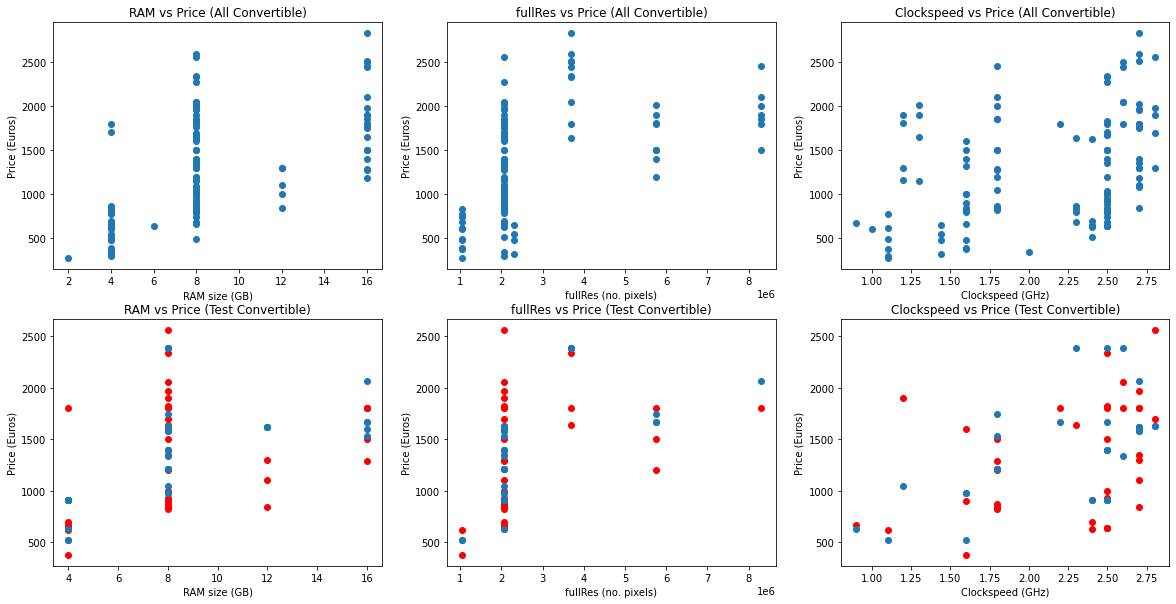

In [15]:
plotResults(Convertible,"Convertible",conv_y,conv_x_test,conv_y_test,conv_pred)

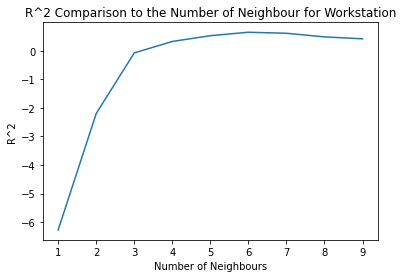

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004
1,Notebook,117391.352511,25708706.20,0.562647
2,Netbook,6142.605000,49140.84,0.970437
3,Gaming,312283.395484,19361570.52,0.584608
4,Convertible,203055.085556,7309983.08,0.342835
5,Workstation,106823.200000,961408.80,0.526172


In [16]:
# Workstation
work_x = Workstation[['RAM', 'fullRes', 'Clockspeed']].values
work_y = Workstation['Price (Euros)'].values
work_x_train, work_x_test, work_y_train, work_y_test = train_test_split(work_x, work_y, test_size = 0.3, random_state = 2201798761)
getBestR2(work_x_train,work_y_train,work_x_test,work_y_test,"Workstation")
work_knn = neighbors.KNeighborsRegressor(n_neighbors = 5).fit(work_x_train,work_y_train)
work_pred = work_knn.predict(work_x_test)

work_mse = mean_squared_error(work_y_test, work_pred)
work_sse = getSSE(work_pred, work_y_test)
work_r2 = r2_score(work_y_test, work_pred)
append = pd.DataFrame({"Category":["Workstation"], "MSE":[work_mse], "SSE":[work_sse], "R2":[work_r2]})
results = results.append(append, ignore_index=True)
results

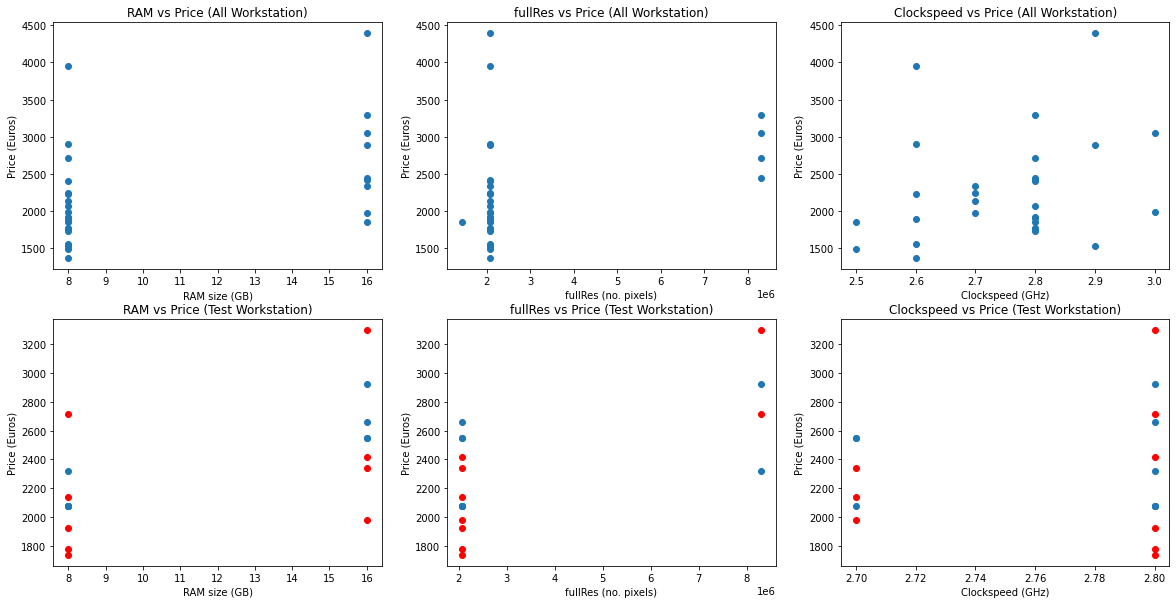

In [17]:
plotResults(Workstation,"Workstation",work_y,work_x_test,work_y_test,work_pred)

In [18]:
results

,Category,MSE,SSE,R2
0,Ultrabook,189581.373559,11185301.04,0.222004
1,Notebook,117391.352511,25708706.20,0.562647
2,Netbook,6142.605000,49140.84,0.970437
3,Gaming,312283.395484,19361570.52,0.584608
4,Convertible,203055.085556,7309983.08,0.342835
5,Workstation,106823.200000,961408.80,0.526172


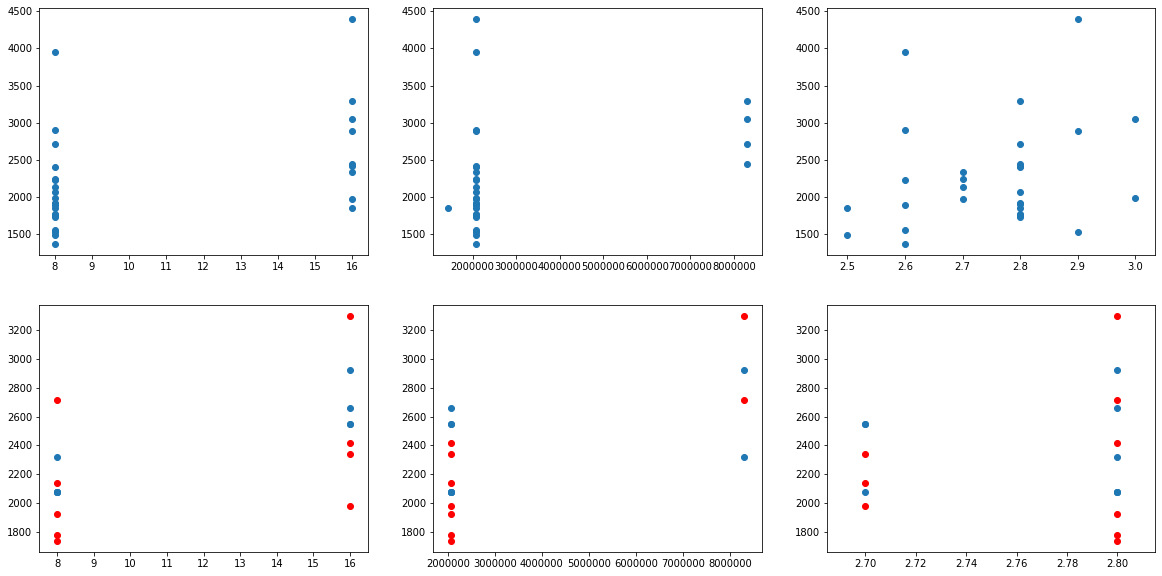